In [ ]:
#we want to predict the percentage of marks that a student
#is expected to score based upon the number of hours they studied.


In [ ]:
# IMPORTING THE REQUIRED LIBRARIES FOR THE TASK

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [4]:
df=pd.read_csv('http://bit.ly/w-data')  #loading the file
df.head() #printing first 5 rows


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


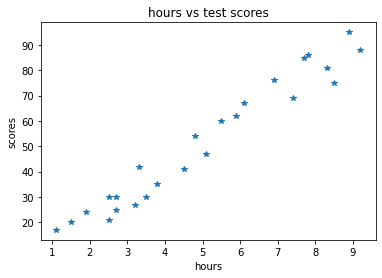

In [5]:
plt.plot(df['Hours'],df['Scores'],'*')
plt.title('hours vs test scores')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [6]:
import scipy.stats
covariance = np.corrcoef(df['Hours'],df['Scores']) #corrcoef() returns the correlation matrix, which is a two-dimensional array with the correlation coefficients.
pearsonr = scipy.stats.pearsonr(df['Hours'],df['Scores']) #to print pearson value. nearer to one states that both features are positively related
print('correlation matrix:',covariance)

print('pearson value:',pearsonr)


correlation matrix: [[1.         0.97619066]
 [0.97619066 1.        ]]
pearson value: (0.9761906560220884, 9.132624467460325e-17)


In [7]:
#converting catogarical values to numerical values  

x = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values


In [8]:
#test train split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0) #test size =0.3


In [9]:
#linear regression

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


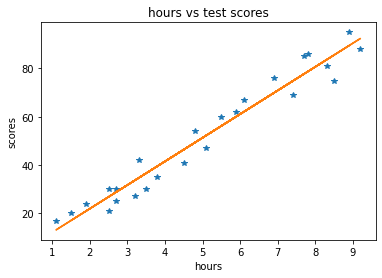

In [11]:
#plotting with the predicted slope

slope=lm.coef_
intersept=lm.intercept_
y1 = lm.coef_*x+lm.intercept_

# Plotting for the test data
plt.plot(x, y,'*')
plt.plot(x, y1)
plt.title('hours vs test scores')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()
plt.show()

In [12]:
#creating table for actual and predicted score 

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred},index=(1,2,3,4,5,6,7,8))
df1

,Actual,Predicted
1,20,17.053665
2,27,33.694229
3,69,74.806209
4,30,26.842232
5,62,60.123359
6,35,39.567369
7,24,20.969092
8,86,78.721636


In [13]:
#predicting the score with inputting the time

hours = [[9.25]]
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 92.91505723477056


In [14]:
#checking the r2 score, mean squared error, root mean squared error and mean absolute error

from sklearn.metrics import r2_score
print('Linear Regression R2 score:',r2_score(y_pred,y_test) )     #better fit for model


from sklearn.metrics import mean_squared_error
print('Linear Regression  mean squared error:',mean_squared_error(y_pred,y_test))


from math import sqrt
rms = sqrt(mean_squared_error(y_pred,y_test))
print('Linear Regression root mean squared error:',rms)


from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))


Linear Regression R2 score: 0.9550952593614691
Linear Regression  mean squared error: 22.96509721270043
Linear Regression root mean squared error: 4.792191274636315
Mean Absolute Error: 4.419727808027652
